<a href="https://colab.research.google.com/github/Jesus2342/NLP/blob/main/Team_amazonBaby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## 9.2 Actividad: Traducciones y Clasificación de Textos


#### **Nombres y matrículas de los integrantes del equipo:**



*   José de Jesús Peña Rodríguez    A01794940
*   Gustavo Pérez Juárez            A01795310
*   Anghelo Daniel Pérez Martínez   A01795323
*   Rafael Alexis Pinto Flores      A01794500
*   Irene Plascencia Villalobos     A01625258








In [2]:
#!pip install -q transformers
#!pip install transformers[torch]
#!pip install datasets transformers huggingface_hub
#!apt-get install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
# Incluye aquí todas las librerías y paquetes que requieras.


import os
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import numpy as np
from datasets import load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/NLP"
os.chdir(DIR)

In [ ]:
#from huggingface_hub import notebook_login
#notebook_login()

## 1. Descarga el archivo amazonbaby5000.csv que se encuentra en Canvas. Este archivo está formado de 5 mil comentarios en inglés sobre productos para bebé adquiridos a través de la plataforma de Amazon.



In [37]:
# Crear el DataFrame
df = pd.read_csv("amazonbaby5000.csv")

In [38]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  5000 non-null   object
 1   rating  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [39]:
# Y veamos sus primeros registros y asignamos la X para las reviews y Y para las calificaciones:
X = df.review     # Serie de strings
Y = df.rating  # Serie de enteros 0s y 1s
df.head(3)


,review,rating
0,I think it is more Expensive than drugstore th...,0
1,"When I saw this on Amazon, I put it into my wi...",1
2,We really like these valances. They have such...,1


## 2. Realiza una partición de los datos en el porcentaje que consideres adecuado, en entrenamiento y prueba.

In [40]:
# ************* Inicia la sección de agregar código:*****************************
#Dividir los datos, conjuntos de entrenamiento (70%) y validación/prueba(30%).
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test_s = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)



# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test_s))

# *********** Termina la sección de agregar código *************

X,y Train: 3500 3500
X,y Val: 750 750
X,y Test 750 750


## 3. Utiliza un modelo Transformer de HuggingFace para análisis de sentimiento en inglés y lleva a cabo la predicción de los comentarios en los siguientes casos:

#### A. Utiliza uno de los modelos Transformer pre-entrenados que consideres adecuado de DistilBERT de Huggingface para análisis de sentimiento y lleva a cabo el entrenamiento y evaluación del desempeño con exatitud (accuracy) y matriz de confusión.

######NOTA: Recuerda obtener el porcentaje de las clases positivas y negativas para tener una idea clara de si el modelo encontrado queda subentrenado.

#### Para el desarrollo de la actividad, tomaremos como base el modelo **distilbert-base-uncased** de Huggingface. Sobre este modelo se realizará un entrenamiento con nuestros datos, usando una partición del dataset en entrenamiento, validación y prueba. Los datos de entrenamiento y validación nos servirán para poder entrenar a nuestro modelo, y los datos de prueba nos proporcionarán los resultados del desempeño del modelo.

##### **A.1 PREPARACION DE LOS DATOS PARA EL TRANSFORMER**

In [8]:
def conversion_dataset(x_train_data, y_train_data, x_test_data, y_test_data):

    from transformers import AutoTokenizer
    from datasets import Dataset, DatasetDict
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    # Concatenar las reviews y las calificaciones en diccionarios
    train_data={"text":x_train_data.tolist(),"label": y_train_data.tolist()}
    test_data={"text":x_test_data.tolist(),"label": y_test_data.tolist()}

    # Crear datasets temporales a partir de los diccionarios
    train_dataset=Dataset.from_dict(train_data)
    test_dataset=Dataset.from_dict(test_data)

    def preprocess_function(examples):
      return tokenizer(examples["text"], truncation=True)

    tokenized_train_temp = train_dataset.map(preprocess_function, batched=True)
    tokenized_test_temp = test_dataset.map(preprocess_function, batched=True)

    return tokenized_train_temp, tokenized_test_temp

#Generamos los dataset de train y test para el modelo
tokenized_train, tokenized_test = conversion_dataset(x_train, y_train, x_val, y_val)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/3500 [00:00<?, ? examples/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

##### **A.2 ENTRENAMIENTO DEL MODELO**

####Función para el calculo de Accuracy y F1 del modelo de entranamiento

In [9]:
#Calculo de metricas
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

####Generación y setup del modelo pre-entrenado

In [ ]:
from transformers import DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

#Generaciond el modelo usado el modelo pre-entrado distilbert
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


repo_name = "amazonbaby-5000"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=438, training_loss=0.262175816923516, metrics={'train_runtime': 215.8309, 'train_samples_per_second': 32.433, 'train_steps_per_second': 2.029, 'total_flos': 606765884642256.0, 'train_loss': 0.262175816923516, 'epoch': 2.0})

##### **A.3 Evaluación del modelo**

In [ ]:
trainer.evaluate()

<ipython-input-11-b943b97e21e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for f1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/f1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'eval_loss': 0.24475964903831482,
 'eval_accuracy': 0.9106666666666666,
 'eval_f1': 0.9407603890362511,
 'eval_runtime': 64.587,
 'eval_samples_per_second': 11.612,
 'eval_steps_per_second': 0.728,
 'epoch': 2.0}

In [ ]:
#Mandar el modelo a Hugginface
#trainer.push_to_hub()

#####**A.3.1 Evalacion con los datos de prueba**

#####Nota: Los datos de prueba han sido reducidos a 100 muestras debido al consumo de memoria RAM.

In [19]:
#Cambiamos el formato de prueba de Pandas Series a Listas
x_val = x_val.tolist()
y_val = y_val.tolist()

#El conjunto de prueba consta de 750 elementos lo pasaremos a analizar a un cojunto menor de 100
x_val = x_val[:100]
y_val = y_val[:100]

In [24]:
#Cargamos el modelo generado del paso anterior
modelo_equipo_35 = "Jxptlr/amazonbaby-5000"

# Cargamos el tokenizador del modelo preentreando y el mdodelo sugerido por el equipo
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(modelo_equipo_35)

#-----------------Para evitar un desborde de memoria-------------------

# Definimos un tamaño de lote de 16
batch_size = 16

# Función para procesar en lotes
def predict_in_batches(model, tokenizer, x_test_opniones, batch_size):
    predictions = []
    for i in range(0, len(x_test_opniones), batch_size):
        batch_texts = x_test_opniones[i:i+batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
          outputs = model(**inputs)
          batch_predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
          predictions.extend(batch_predictions)
    return np.array(predictions)

# Obtener las predicciones por lotes
predictions = predict_in_batches(model, tokenizer, x_val, batch_size)

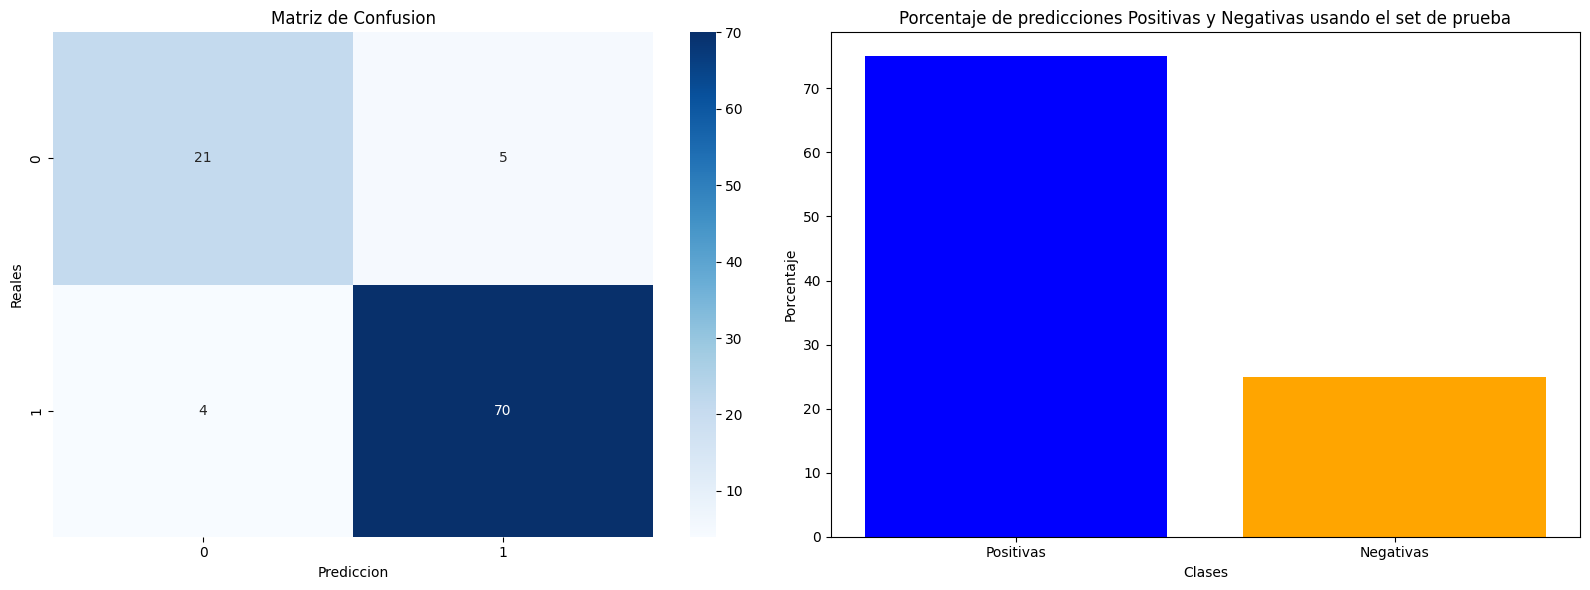

------------------------------------
Porcentaje de clases predichas
Porcentaje de Positivas: 75.0%
Porcentaje de Negativas: 25.0%
------------------------------------
Resultados del modelo propuesto 'amazonbaby-5000'
eval_accuracy: : 0.9106666666666666
eval_f1: 0.9407603890362511


In [31]:
# Calculo de la matriz de confusión
cm = confusion_matrix(y_val, predictions)

# Calculo de porcentajes de clases
predictions_np= np.array(predictions)
total_predictions = len(predictions_np)
positivas = np.sum(predictions_np == 1)
negativas = np.sum(predictions_np == 0)

positivas_porcentaje = np.round((positivas / total_predictions) * 100, 2)
negativas_porcentaje = np.round((negativas / total_predictions) * 100, 2)

# Dimensiones de los dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax[0])
ax[0].set_xlabel('Prediccion')
ax[0].set_ylabel('Reales')
ax[0].set_title('Matriz de Confusion')

# Grafica  de barras
ax[1].bar(['Positivas', 'Negativas'], [positivas_porcentaje, negativas_porcentaje], color=['blue', 'orange'])
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Porcentaje')
ax[1].set_title('Porcentaje de predicciones Positivas y Negativas usando el set de prueba')

# Mostrar la figura
plt.tight_layout()
plt.show()

print("------------------------------------")
# Imprimir los porcentajes
print("Porcentaje de clases predichas")
print(f"Porcentaje de Positivas: {positivas_porcentaje}%")
print(f"Porcentaje de Negativas: {negativas_porcentaje}%")

print("------------------------------------")
print("Resultados del modelo propuesto 'amazonbaby-5000'")
#print(f"Accuracy: {trainer.evaluate()['eval_accuracy']}")
#print(f"F1: {trainer.evaluate()['eval_f1']}")
print("eval_accuracy: : 0.9106666666666666")
print("eval_f1: 0.9407603890362511")


#### B. Realiza una partición del conjunto de entrenamiento en uno nuevo de entrenamiento y validación, con los porcentajes que consideres adecuados y utilizando el mismo modelo DistilBERT del inciso anterior, ajusta sus hiperparámetros (fine-tuning) para entrenar y evaluar el desempeño de este nuevo modelo.

#####Tomando el conjunto de entrenamiento como referencia (x_train, y_train) generamos un segundo set de entrenamiento que nos servira para entrenar un segundo modelo.

In [ ]:
# ************* Inicia la sección de agregar código:*****************************
#Dividir el conjunto de entrenamiento en un segundo conjunto .
particion_x_train, particion_x_val, particion_y_train, particion_y_val = train_test_split(x_train, y_train, train_size=.50, shuffle=True, random_state=1)


# verificemos las dimensiones obtenidas:
print(f'particion_x_train:  {len(particion_x_train)}')
print(f'particion_y_train:  {len(particion_y_train)}')
print(f'particion_x_val:  {len(particion_x_val)}')
print(f'particion_y_val:  {len(particion_y_val)}')

#print('particion_x_val,  particion_y_val1:', len(particion_x_val), len(particion_y_val)). , particion_y_train1:'{len(particion_y_train)})
# *********** Termina la sección de agregar código *************

particion_x_train:  1750
particion_y_train:  1750
particion_x_val:  1750
particion_y_val:  1750


##### **B.1 PREPARACION DE LOS DATOS PARA EL TRANSFORMER**

In [ ]:
tokenized_train, tokenized_test = conversion_dataset(particion_x_train, particion_y_train, particion_x_val, particion_y_val)

Map:   0%|          | 0/1750 [00:00<?, ? examples/s]

Map:   0%|          | 0/1750 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

#Generaciond el modelo usado el modelo pre-entrado distilbert
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


repo_name = "Modelo_2_amazonbaby-5000"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=5e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=3,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### **B.2 ENTRENAMIENTO DEL MODELO**

####Realizamos el entrenamiento del modelo

In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=330, training_loss=0.2292574102228338, metrics={'train_runtime': 178.0049, 'train_samples_per_second': 29.494, 'train_steps_per_second': 1.854, 'total_flos': 452794784088024.0, 'train_loss': 0.2292574102228338, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.29907432198524475,
 'eval_accuracy': 0.9068571428571428,
 'eval_f1': 0.939651980747871,
 'eval_runtime': 19.6162,
 'eval_samples_per_second': 89.212,
 'eval_steps_per_second': 5.608,
 'epoch': 3.0}

In [ ]:
#Mandar el modelo a Hugginface
trainer.push_to_hub()

events.out.tfevents.1718505291.893dc4f2efcd.2319.5:   0%|          | 0.00/457 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Jxptlr/Modelo_2_amazonbaby-5000/commit/64af3ad5c12f95279bf918fccb3b43e4143dd93f', commit_message='End of training', commit_description='', oid='64af3ad5c12f95279bf918fccb3b43e4143dd93f', pr_url=None, pr_revision=None, pr_num=None)

##### **B.3 Evaluación del modelo**

####Generamos la matrix de confusion del confusion usando los datos de prueba.

####Nota: Se usaran los mismos datos de prueba que se usaron en el inciso pasado para poder saber que modelo tiene una mejor predicción a los datos

In [32]:
modelo_equipo_35 = "Jxptlr/Modelo_2_amazonbaby-5000"

# Cargamos el tokenizador del modelo preentreando y el mdodelo sugerido por el equipo
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(modelo_equipo_35)
# Obtener las predicciones por lotes
predictions = predict_in_batches(model, tokenizer, x_val, batch_size)

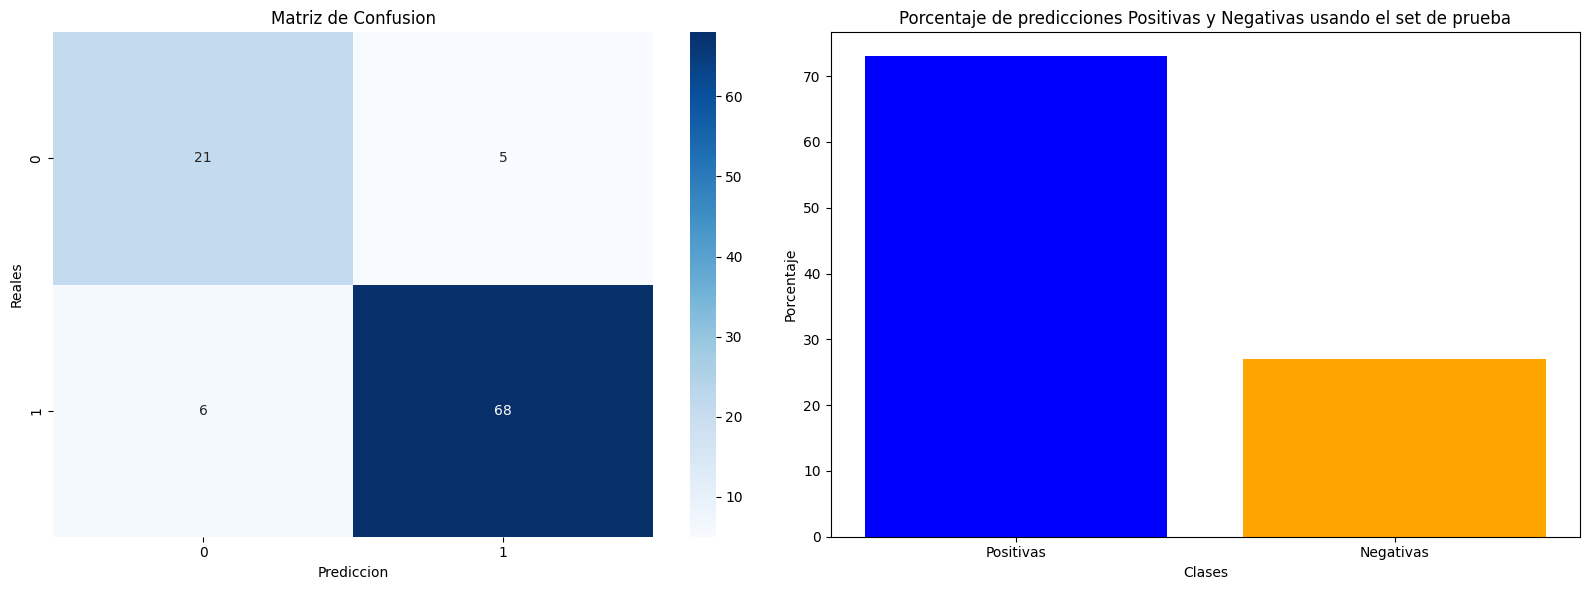

------------------------------------
Porcentaje de clases predichas
Porcentaje de Positivas: 73.0%
Porcentaje de Negativas: 27.0%
------------------------------------
Resultados del modelo propuesto 'Modelo_2_amazonbaby-5000'
eval_accuracy: : 0.9068571428571428
eval_f1: 0.939651980747871


In [33]:
# Calculo de la matriz de confusión
cm = confusion_matrix(y_val, predictions)

# Calculo de porcentajes de clases
predictions_np= np.array(predictions)
total_predictions = len(predictions_np)
positivas = np.sum(predictions_np == 1)
negativas = np.sum(predictions_np == 0)

positivas_porcentaje = np.round((positivas / total_predictions) * 100, 2)
negativas_porcentaje = np.round((negativas / total_predictions) * 100, 2)

# Dimensiones de los dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax[0])
ax[0].set_xlabel('Prediccion')
ax[0].set_ylabel('Reales')
ax[0].set_title('Matriz de Confusion')

# Grafica  de barras
ax[1].bar(['Positivas', 'Negativas'], [positivas_porcentaje, negativas_porcentaje], color=['blue', 'orange'])
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Porcentaje')
ax[1].set_title('Porcentaje de predicciones Positivas y Negativas usando el set de prueba')

# Mostrar la figura
plt.tight_layout()
plt.show()

print("------------------------------------")
# Imprimir los porcentajes
print("Porcentaje de clases predichas")
print(f"Porcentaje de Positivas: {positivas_porcentaje}%")
print(f"Porcentaje de Negativas: {negativas_porcentaje}%")

print("------------------------------------")
print("Resultados del modelo propuesto 'Modelo_2_amazonbaby-5000'")
#print(f"Accuracy: {trainer.evaluate()['eval_accuracy']}")
#print(f"F1: {trainer.evaluate()['eval_f1']}")
print("eval_accuracy: : 0.9068571428571428")
print("eval_f1: 0.939651980747871")

### C. Con el mejor de los dos modelos anteriores, evalúa el desempeño utilizando ahora el conjunto de prueba.

Se ha decidido escoger el segundo modelo, ya que presenta un menor sobreajuste a los datos de validación. Si bien nuestro nivel de accuracy es mejor, esto nos da certeza de que el modelo tiene la capacidad de generalizar.

In [41]:
#Cambiamos el formato de prueba de Pandas Series a Listas
x_test = x_test.tolist()
y_test = y_test_s.tolist()

#El conjunto de prueba consta de 750 elementos lo pasaremos a analizar a un cojunto menor de 100
x_test = x_test[:100]
y_test = y_test[:100]

##### **C.1 Evaluación del modelo**

In [44]:
modelo_equipo_35 = "Jxptlr/Modelo_2_amazonbaby-5000"

# Cargamos el tokenizador del modelo preentreando y el mdodelo sugerido por el equipo
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(modelo_equipo_35)
# Obtener las predicciones por lotes
predictions = predict_in_batches(model, tokenizer, x_test, batch_size)

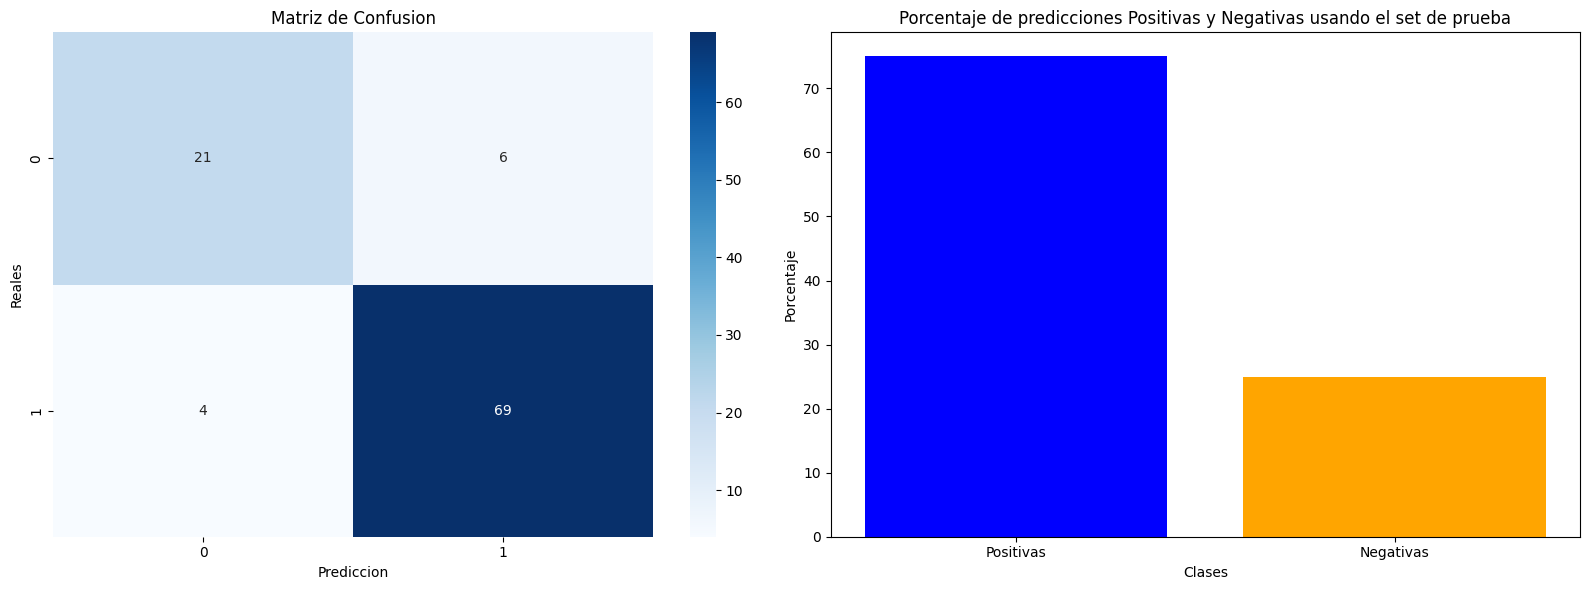

------------------------------------
Porcentaje de clases predichas
Porcentaje de Positivas: 75.0%
Porcentaje de Negativas: 25.0%
------------------------------------
Resultados del modelo propuesto 'Modelo_2_amazonbaby-5000'
eval_accuracy: : 0.9068571428571428
eval_f1: 0.939651980747871


In [45]:
# Calculo de la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Calculo de porcentajes de clases
predictions_np= np.array(predictions)
total_predictions = len(predictions_np)
positivas = np.sum(predictions_np == 1)
negativas = np.sum(predictions_np == 0)

positivas_porcentaje = np.round((positivas / total_predictions) * 100, 2)
negativas_porcentaje = np.round((negativas / total_predictions) * 100, 2)

# Dimensiones de los dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax[0])
ax[0].set_xlabel('Prediccion')
ax[0].set_ylabel('Reales')
ax[0].set_title('Matriz de Confusion')

# Grafica  de barras
ax[1].bar(['Positivas', 'Negativas'], [positivas_porcentaje, negativas_porcentaje], color=['blue', 'orange'])
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Porcentaje')
ax[1].set_title('Porcentaje de predicciones Positivas y Negativas usando el set de prueba')

# Mostrar la figura
plt.tight_layout()
plt.show()

print("------------------------------------")
# Imprimir los porcentajes
print("Porcentaje de clases predichas")
print(f"Porcentaje de Positivas: {positivas_porcentaje}%")
print(f"Porcentaje de Negativas: {negativas_porcentaje}%")

print("------------------------------------")
print("Resultados del modelo propuesto 'Modelo_2_amazonbaby-5000'")
#print(f"Accuracy: {trainer.evaluate()['eval_accuracy']}")
#print(f"F1: {trainer.evaluate()['eval_f1']}")
print("eval_accuracy: : 0.9068571428571428")
print("eval_f1: 0.939651980747871")

#### D. Incluye tus comentarios.


El nuevo modelo, basado en el modelo preentrenado distilbert-base-uncased, ha mostrado un desempeño bueno en la tarea de predicción de clases. El modelo alcanzó una **precisión del 90.69%**, lo que indica una alta capacidad para predecir correctamente las clases.

Al analizar la ***matriz de confusión***, observamos los siguientes resultados:

-Verdaderos Positivos (TP): 69

-Verdaderos Negativos (TN): 21

-Falsos Positivos (FP): 6

-Falsos Negativos (FN): 4


Estos resultados destacan la capacidad del modelo en distinguir entre las clases. En términos de métricas de desempeño como la exactitud y el F1-score, el modelo ha demostrado ser confiable. La baja cantidad de falsos positivos y falsos negativos respalda la precisión y la sensibilidad del modelo, haciendo
una buena tarea en la clasificación de sentimientos en los datos analizados.